In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1> Attack </h1>

In [4]:
# Code for 1 game, where n is the initial number of strings in the bowl
# Note: 1 game is defined as joining pairs of ends with n starting strings, until we cannot get any more loops
# Below I will use the following notation: 
# Each string will have their ends denoted by pairs of numbers. e.g. one string has their 2 ends denoted (0,1). Another will have (2,3), and so on.
# To make the code easier, I labelled each end with an index: 
# For the (0,1) string, the 0 end is denoted [0,0]. The 1 end is denoted [0,1].
# For the (2,3) string, the 2 end is denoted [1,0]. The 3 end is denoted [1,1].
# The indexing pattern continues as above!

n = 5
ends = [_ for _ in range(2*n)]
enum_strings_init = [[i, i+1] for i in range(2*n)]
enum_strings = []
no_strings = n
no_loops = 0
for i in range(n):
    enum_strings.append(enum_strings_init[2*i])

while(no_strings > 0):
    print(f'Possible ends to choose from: {ends}')
    print(f'Current loop tally: {no_loops}')
    print(f'Number of strings: {no_strings}')
    
    ends_chosen = np.random.choice(ends, 2, replace = False)
    e1 = ends_chosen[0]
    e2 = ends_chosen[1]
    print(f'Ends chosen: {e1, e2}')
    for l in range(len(enum_strings)):
        if(enum_strings[l][0] == e1):
            e1_index = [l, 0]
        elif(enum_strings[l][1] == e1):
            e1_index = [l, 1]
    for l in range(len(enum_strings)):
        if(enum_strings[l][0] == e2):
            e2_index = [l, 0]
        elif(enum_strings[l][1] == e2):
            e2_index = [l, 1]
    #print(e1, e1_index, e2, e2_index)
    if(e1_index[0] == e2_index[0]): #case 1 : join two ends of same string [[0,1],[2,3],[4,5]] -> [[2,3],[4,5]], no_strings -= 1, no_loops += 1
        print(f'Loop formed')
        no_loops += 1
        enum_strings2 = []
        for i in range(len(enum_strings)):
            if(i != e1_index[0]):
                enum_strings2.append(enum_strings[i])
        #print(enum_strings2)
        enum_strings = enum_strings2
        ends = []    
        for j in range(len(enum_strings)):
            ends.append(enum_strings[j][0])
            ends.append(enum_strings[j][1])
    else: #case 2 : join two ends of different strings [[0,1],[2,3],[4,5]] --(0, 3 picked for example)--> no_strings -= 1, ignore labelling and say we now have [[0,1],[2,3]]
        print(f'Two strings joined')
        enum_strings3 = []
        for i in range(len(enum_strings) - 1):
            enum_strings3.append(enum_strings_init[2*i])
        enum_strings = enum_strings3
        ends = []    
        for j in range(len(enum_strings)):
            ends.append(enum_strings[j][0])
            ends.append(enum_strings[j][1])
    no_strings = len(enum_strings)
    
print(f'GAME SUMMARY INFORMATION')
print(f'TOTAL NUMBER OF LOOPS FORMED: {no_loops}')

Possible ends to choose from: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Current loop tally: 0
Number of strings: 5
Ends chosen: (9, 0)
Two strings joined
Possible ends to choose from: [0, 1, 2, 3, 4, 5, 6, 7]
Current loop tally: 0
Number of strings: 4
Ends chosen: (3, 4)
Two strings joined
Possible ends to choose from: [0, 1, 2, 3, 4, 5]
Current loop tally: 0
Number of strings: 3
Ends chosen: (3, 2)
Loop formed
Possible ends to choose from: [0, 1, 4, 5]
Current loop tally: 1
Number of strings: 2
Ends chosen: (5, 4)
Loop formed
Possible ends to choose from: [0, 1]
Current loop tally: 2
Number of strings: 1
Ends chosen: (1, 0)
Loop formed
GAME SUMMARY INFORMATION
TOTAL NUMBER OF LOOPS FORMED: 3


<h1> Extension </h1>

Sum equation for $E(Y_i)$, as in my conjecture

In [5]:

X = 100 # where X is the total number of strings in the bowl at the start 
j = [i for i in range(X+1)]

Sum = []
total = 0
for i in range(1, len(j)):
    E_i = 1/(2*i-1)
    total += E_i
    Sum.append(total)
    
Sum


[1.0,
 1.3333333333333333,
 1.5333333333333332,
 1.676190476190476,
 1.7873015873015872,
 1.878210678210678,
 1.9551337551337549,
 2.0218004218004215,
 2.080623951212186,
 2.1332555301595546,
 2.180874577778602,
 2.2243528386481675,
 2.2643528386481675,
 2.3013898756852047,
 2.335872634305894,
 2.368130698822023,
 2.3984337291250535,
 2.427005157696482,
 2.454032184723509,
 2.4796732103645347,
 2.5040634542669737,
 2.527319268220462,
 2.5495414904426843,
 2.5708180861873653,
 2.591226249452671,
 2.610834092589926,
 2.629702017118228,
 2.6478838353000462,
 2.665427694949169,
 2.682376847491542,
 2.6987702901144925,
 2.7146433059875084,
 2.7300279213721237,
 2.744953294506452,
 2.7594460481296403,
 2.773530555171894,
 2.78722918530888,
 2.8005625186422134,
 2.8135495316292265,
 2.826207759477328,
 2.8385534384896736,
 2.850601631260758,
 2.862366337143111,
 2.8738605900166743,
 2.885096545072854,
 2.896085556061865,
 2.906838244233908,
 2.9173645600233815,
 2.927673838373897,
 2.93777484

Proportion of closed loops formed as a fraction of the initial number of strings, $E(Y_i)/i$

In [6]:
X = 100
j = [i for i in range(X+1)]

Ratio = []
total = 0
for i in range(1, len(j)):
    E_i = 1/(2*i-1)
    total += E_i
    Ratio.append(total/i)
    
Ratio

[1.0,
 0.6666666666666666,
 0.5111111111111111,
 0.419047619047619,
 0.3574603174603174,
 0.313035113035113,
 0.279304822161965,
 0.2527250527250527,
 0.2311804390235762,
 0.21332555301595546,
 0.19826132525260018,
 0.18536273655401395,
 0.17418098758832057,
 0.16438499112037178,
 0.1557248422870596,
 0.14800816867637645,
 0.1410843370073561,
 0.13483361987202677,
 0.12915958866965838,
 0.12398366051822673,
 0.11924111686985589,
 0.11487814855547555,
 0.11084963001924715,
 0.10711742025780689,
 0.10364904997810685,
 0.1004166958688433,
 0.09739637100437883,
 0.09456727983214451,
 0.09191129982583342,
 0.0894125615830514,
 0.08705710613272556,
 0.08483260331210964,
 0.0827281188294583,
 0.08073392042666035,
 0.07884131566084687,
 0.0770425154214415,
 0.07533051852186162,
 0.0736990136484793,
 0.07214229568280069,
 0.07065519398693319,
 0.06923301069487009,
 0.06787146741097043,
 0.06656665900332816,
 0.06531501340946987,
 0.06411325655717454,
 0.0629583816535188,
 0.06184762221774272,
 

Plotting graphs to visualise $E(Y_i)/i$

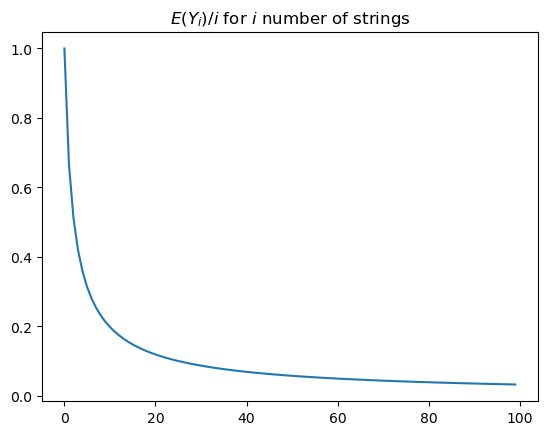

In [7]:
plt.plot(Ratio)
plt.title('$E(Y_i)/i$ for $i$ number of strings')
plt.show()

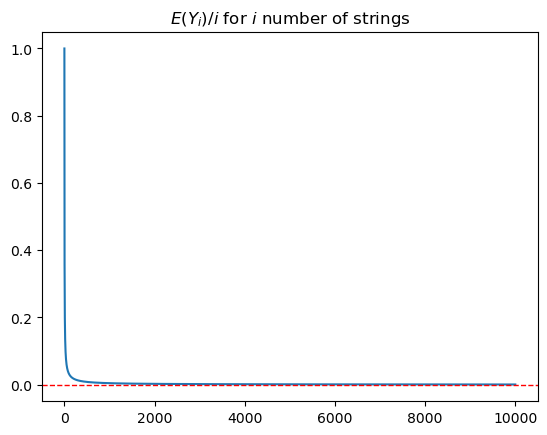

In [8]:
# Exploring larger i values to verify convergence towards 0

Ratio = []
total = 0
for i in range(1, 10000):
    E_i = 1/(2*i-1)
    total += E_i
    Ratio.append(total/i)
 
plt.plot(Ratio)
plt.axhline(0, lw = 1, color = 'r', linestyle = '--')
plt.title('$E(Y_i)/i$ for $i$ number of strings')
plt.show()
    

Investigating the distribution of the number of closed loops 

/Users/joelyto/opt/anaconda3/envs/jelly/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


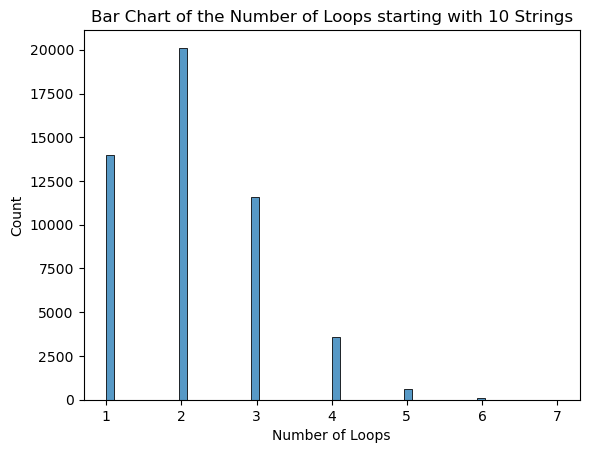

In [9]:
iterations = 50000
no_loops_array = []
for its in range(iterations):
    n = 10
    ends = [_ for _ in range(2*n)]
    enum_strings_init = [[i, i+1] for i in range(2*n)]
    enum_strings = []
    no_strings = n
    no_loops = 0
    for i in range(n):
        enum_strings.append(enum_strings_init[2*i])
    while(no_strings > 0):
        ends_chosen = np.random.choice(ends, 2, replace = False)
        e1 = ends_chosen[0]
        e2 = ends_chosen[1]
        for l in range(len(enum_strings)):
            if(enum_strings[l][0] == e1):
                e1_index = [l, 0]
            elif(enum_strings[l][1] == e1):
                e1_index = [l, 1]
        for l in range(len(enum_strings)):
            if(enum_strings[l][0] == e2):
                e2_index = [l, 0]
            elif(enum_strings[l][1] == e2):
                e2_index = [l, 1]
        if(e1_index[0] == e2_index[0]):
            no_loops += 1
            enum_strings2 = []
            for i in range(len(enum_strings)):
                if(i != e1_index[0]):
                    enum_strings2.append(enum_strings[i])
            enum_strings = enum_strings2
            ends = []    
            for j in range(len(enum_strings)):
                ends.append(enum_strings[j][0])
                ends.append(enum_strings[j][1])
        else:
            enum_strings3 = []
            for i in range(len(enum_strings) - 1):
                enum_strings3.append(enum_strings_init[2*i])
            enum_strings = enum_strings3
            ends = []    
            for j in range(len(enum_strings)):
                ends.append(enum_strings[j][0])
                ends.append(enum_strings[j][1])
        no_strings = len(enum_strings)
    no_loops_array.append(no_loops)
plt.figure()
sns.histplot(no_loops_array)
plt.title(f'Bar Chart of the Number of Loops starting with {n} Strings')
plt.xlabel('Number of Loops')
plt.show()

In [10]:
def simulation(n, iterations):
    no_loops_array = []
    for its in range(iterations):
        ends = [_ for _ in range(2*n)]
        enum_strings_init = [[i, i+1] for i in range(2*n)]
        enum_strings = []
        no_strings = n
        no_loops = 0
        for i in range(n):
            enum_strings.append(enum_strings_init[2*i])
        while(no_strings > 0):
            ends_chosen = np.random.choice(ends, 2, replace = False)
            e1 = ends_chosen[0]
            e2 = ends_chosen[1]
            for l in range(len(enum_strings)):
                if(enum_strings[l][0] == e1):
                    e1_index = [l, 0]
                elif(enum_strings[l][1] == e1):
                    e1_index = [l, 1]
            for l in range(len(enum_strings)):
                if(enum_strings[l][0] == e2):
                    e2_index = [l, 0]
                elif(enum_strings[l][1] == e2):
                    e2_index = [l, 1]
            if(e1_index[0] == e2_index[0]):
                no_loops += 1
                enum_strings2 = []
                for i in range(len(enum_strings)):
                    if(i != e1_index[0]):
                        enum_strings2.append(enum_strings[i])
                enum_strings = enum_strings2
                ends = []    
                for j in range(len(enum_strings)):
                    ends.append(enum_strings[j][0])
                    ends.append(enum_strings[j][1])
            else:
                enum_strings3 = []
                for i in range(len(enum_strings) - 1):
                    enum_strings3.append(enum_strings_init[2*i])
                enum_strings = enum_strings3
                ends = []    
                for j in range(len(enum_strings)):
                    ends.append(enum_strings[j][0])
                    ends.append(enum_strings[j][1])
            no_strings = len(enum_strings)
        no_loops_array.append(no_loops)
    return(no_loops_array)

/Users/joelyto/opt/anaconda3/envs/jelly/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joelyto/opt/anaconda3/envs/jelly/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joelyto/opt/anaconda3/envs/jelly/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joelyto/opt/anaconda3/envs/jelly/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

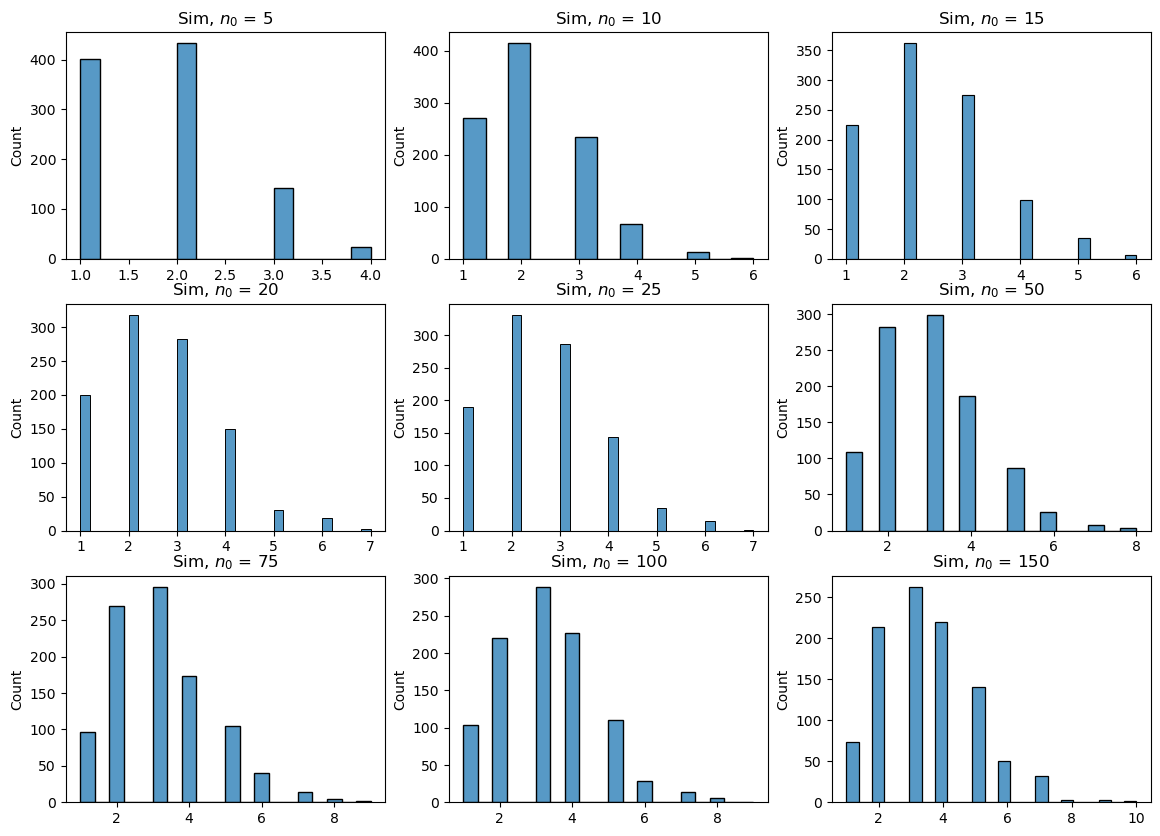

In [11]:
# Plotting a comparison grid for a wider range of initial string numbers

nsims = int(1e3)
fig, axs = plt.subplots(3, 3, figsize = (14,10))
sns.histplot(simulation(5,nsims), ax = axs[0,0])
axs[0, 0].set_title('Sim, $n_0$ = 5')
sns.histplot(simulation(10,nsims), ax = axs[0,1])
axs[0, 1].set_title('Sim, $n_0$ = 10')
sns.histplot(simulation(15,nsims), ax = axs[0,2])
axs[0, 2].set_title('Sim, $n_0$ = 15')
sns.histplot(simulation(20,nsims), ax = axs[1,0])
axs[1, 0].set_title('Sim, $n_0$ = 20')
sns.histplot(simulation(25,nsims), ax = axs[1,1])
axs[1, 1].set_title('Sim, $n_0$ = 25')
sns.histplot(simulation(50,nsims), ax = axs[1,2])
axs[1, 2].set_title('Sim, $n_0$ = 50')
sns.histplot(simulation(75,nsims), ax = axs[2,0])
axs[2, 0].set_title('Sim, $n_0$ = 75')
sns.histplot(simulation(100,nsims), ax = axs[2,1])
axs[2, 1].set_title('Sim, $n_0$ = 100')
sns.histplot(simulation(150,nsims), ax = axs[2,2])
axs[2, 2].set_title('Sim, $n_0$ = 150')
plt.show()